### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

def temps(n,v = 0.5): # je cree une fonction temps , qui prend comme argument n et to (si il ny a rien jaurai to = 0.5)
    tn = n + v* np.sqrt(n) # formule donnee
    return tn

tab = [] # creation de mon tableau 

for i in range(51): #ma boucle pour mes 50 valeurs
    val = temps(i)
    tab.append(val)
        

print(tab[1] == 1.5) # je verifie que mes valeurs sont egaux a celle attendu 
print(tab[4] == 5.0)
print(tab[9] == 10.5)
print(tab[16] == 18)
print(tab[25] == 27.5)



True
True
True
True
True


In [58]:
def vx(tableau, n): #fonction pour vitesse en x
    vitessex = (-1)**n * np.sqrt(n + 1) * np.sin(np.pi * (tableau[n] - tableau[n+1]))
    return vitessex

def vy(tableau, n): #fonction pour vitesse en y
    vessey= -(-1)**n * np.sqrt(n +1) * np.cos(np.pi * (tableau[n] - tableau[n+1]))
    return vessey
    


In [62]:
# pour les vitesses de t2 - 1 a t2
t2 = np.arange(tab[2]-1, tab[2], 0.03)


for i in range(len(t2)):
    val = temps(i)
    t2 + val
    
t2vx = []
t2vy = []

for i in range(len(t2)-1):
    t2vx.append(vx(t2, i))
    t2vy.append(vy(t2, i))

In [65]:
#pour les vitesses de t4 -1 a t4
t4= np.arange(tab[4]-1, tab[4], 0.03)

for i in range(len(t4)):
    val = temps(i)
    t4 + val
    
t4vx = []
t4vy = []

for i in range(len(t4)-1):
    t4vx.append(vx(t4, i))
    t4vy.append(vy(t4, i))
    


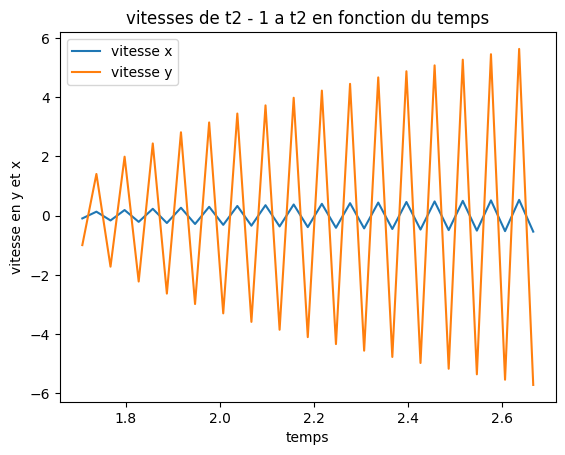

In [66]:
#tracer graphiquement les vitesses de t2 - 1 a t2 en fonction du temps

plt.plot(t2[:-1], t2vx, label = "vitesse x")
plt.plot(t2[:-1], t2vy, label = "vitesse y")
plt.title("vitesses de t2 - 1 a t2 en fonction du temps")
plt.xlabel("temps")
plt.ylabel("vitesse en y et x")
plt.legend()

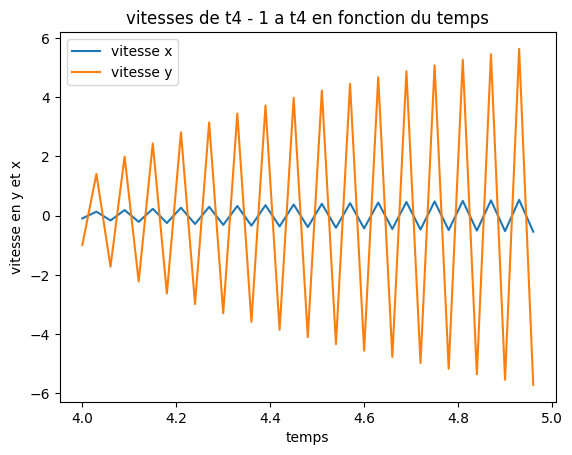

In [67]:
#tracer graphiquement les vitesses de t4 - 1 a t4 en fonction du temps

plt.plot(t4[:-1], t4vx, label = "vitesse x")
plt.plot(t4[:-1], t4vy, label = "vitesse y")
plt.title("vitesses de t4 - 1 a t4 en fonction du temps")
plt.xlabel("temps")
plt.ylabel("vitesse en y et x")
plt.legend()

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

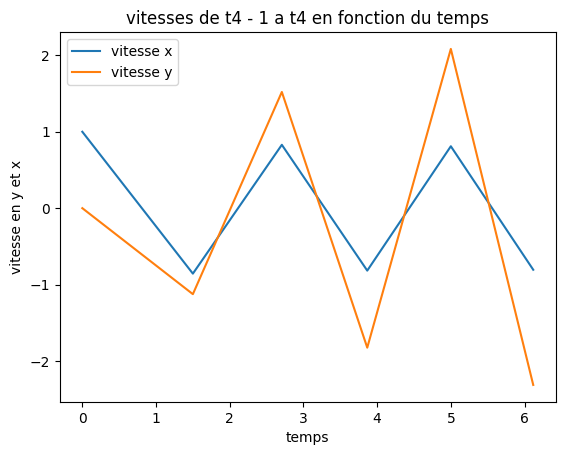

In [71]:
t6 = tab[:7] #on reprend notre tableau de base et on prend les 6 premier elements
t6vx = [] # on cree nos tableau pour les vitesses
t6vy = []

for i in range(len(t6)-1): # on calcule nos vitesses
    t6vx.append(vx(t6, i))
    t6vy.append(vy(t6, i))
    
plt.plot(t6[:-1], t6vx, label = "vitesse x") # on trqce a nouveau les vitesse en fonction du temps
plt.plot(t6[:-1], t6vy, label = "vitesse y")
plt.title("vitesses de t4 - 1 a t4 en fonction du temps")
plt.xlabel("temps")
plt.ylabel("vitesse en y et x")
plt.legend()


On remarque ici que ce ne sont pas courbes continue ceci pourrais etre du a un probleme dans lappel de la fonction des vitesses ou i pourrais etre le probleme. Mais si on prend juste les donnees theorique ceci serait coherant car les positions on une trajectoire continue.

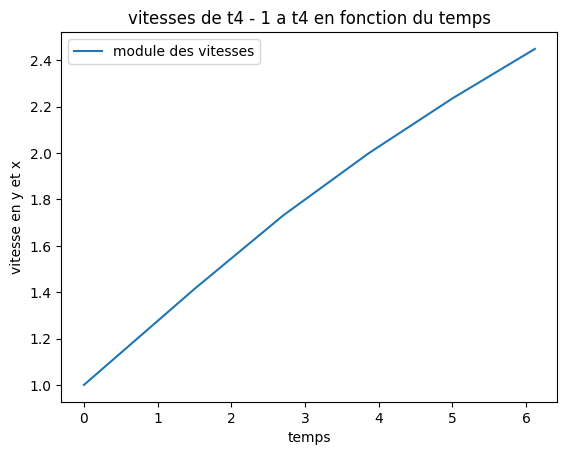

In [83]:
mod = [] # creation du tableau 

for i in range(len(t6)-1): #boucle pour faire le module de chaque vitesse
    v = np.sqrt(t6vx[i]**2 + t6vy[i]**2)
    mod.append(v)

# tracer le graph des modules
plt.plot(t6[:-1], mod, label = "module des vitesses")
plt.title("vitesses de t4 - 1 a t4 en fonction du temps")
plt.xlabel("temps")
plt.ylabel("vitesse en y et x")
plt.legend()
    

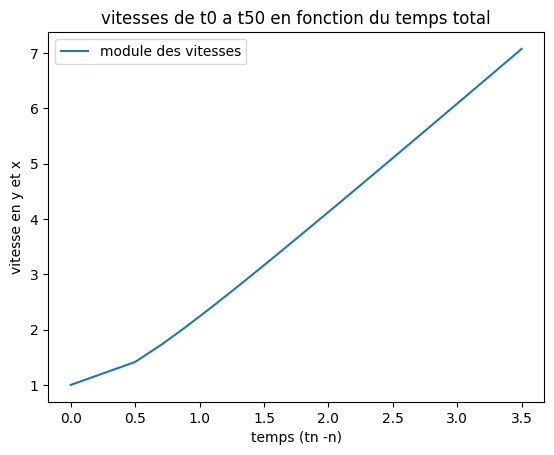

In [89]:
#pour n variant de 0 a 50

tabvx = []
tabvy = []

for i in range(len(tab)-1):
    tabvx.append(vx(tab, i))
    tabvy.append(vy(tab, i))
    
mod2 = [] # creation du tableau 

for i in range(len(tab)-1): #boucle pour faire le module de chaque vitesse
    v = np.sqrt(tabvx[i]**2 + tabvy[i]**2)
    mod2.append(v)
#tn - n
t_tot = []
for i in range(len(tab)):
    t_tot.append(tab[i]-i)
    
# tracer le graph des modules
plt.plot(t_tot[:-1], mod2, label = "module des vitesses")
plt.title("vitesses de t0 a t50 en fonction du temps total")
plt.xlabel("temps (tn -n)")
plt.ylabel("vitesse en y et x")
plt.legend()
    

In [ ]:
Mes donnees nont pas lair coherat avec ce qui est attendu, ceci peut etre du a une mauvaise definition des vitesses ou des 